In [ ]:
#!pip install geopandas


In [4]:
import pandas as pd
import pandas as pandas
import geopandas as gpd


In [5]:
africa_df = pd.read_excel('../data/electricity_generation_data/african_countries.xlsx')
africa_df.head()

,Countries,Region
0,Algeria,Northern Africa
1,Egypt,Northern Africa
2,Libya,Northern Africa
3,Morocco,Northern Africa
4,Sudan,Northern Africa


In [6]:
generation_df = pd.read_csv('../data/electricity_generation_data/electricity-generation.csv')
generation_df.head()

,Entity,Code,Year,Electricity generation - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56


In [7]:
demand_df = pd.read_csv('../data/electricity_generation_data/electricity-demand.csv')
demand_df.head()

,Entity,Code,Year,Electricity demand - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56


In [8]:
pop_density = pd.read_csv('../data/pop_density_data/Kenya_pop_data.csv')
pop_density.head()

,X,Y,Z
0,35.244583,5.462084,52.668011
1,35.252917,5.462084,42.566807
2,35.261250,5.462084,39.304050
3,35.269583,5.462084,41.851067
4,35.277917,5.462084,38.238289


### **Income Level Data**

**GEOPACKAGE FILE**

In [9]:
import sqlite3

# Connect to the GeoPackage file
file_path = r'C:\Users\user\Documents\PHASE_5- Capstone Project\phase-5-project\Energy-Access-and-Electrification-planning\data\income_level_data\GSAP_AM24_2021.gpkg'
conn = sqlite3.connect(file_path)
cursor = conn.cursor()

# Re-check the list of tables to confirm
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in GeoPackage:", tables)

# Try to get information from gpkg_contents again
try:
    cursor.execute("SELECT * FROM gpkg_contents;")
    content_info = cursor.fetchall()
    print("Content Information from gpkg_contents:", content_info)
except sqlite3.OperationalError as e:
    print("Error accessing gpkg_contents:", e)

# Check gpkg_geometry_columns for any geometry-related information
try:
    cursor.execute("SELECT * FROM gpkg_geometry_columns;")
    geometry_info = cursor.fetchall()
    print("Geometry Information from gpkg_geometry_columns:", geometry_info)
except sqlite3.OperationalError as e:
    print("Error accessing gpkg_geometry_columns:", e)

# Close the connection
conn.close()


Tables in GeoPackage: [('gpkg_spatial_ref_sys',), ('gpkg_contents',), ('gpkg_ogr_contents',), ('gpkg_geometry_columns',), ('gpkg_tile_matrix_set',), ('gpkg_tile_matrix',), ('sqlite_sequence',), ('gpkg_extensions',)]
Content Information from gpkg_contents: []
Geometry Information from gpkg_geometry_columns: []


### **Accessing Tile and Matrix Data**

In [10]:
conn = sqlite3.connect(file_path)
cursor = conn.cursor()

# Inspect 'gkpg_tile_matrix_set'
cursor.execute("SELECT * FROM gpkg_tile_matrix_set;")
tile_matrix_set_info = cursor.fetchall()
print("Tile Matrix Set Information:", tile_matrix_set_info)

# Inspect `gpkg_tile_matrix`
cursor.execute("SELECT * FROM gpkg_tile_matrix;")
tile_matrix_info = cursor.fetchall()
print("Tile Matrix Information:", tile_matrix_info)

# Close the connection
conn.close()

Tile Matrix Set Information: []
Tile Matrix Information: []


In [11]:
import sqlite3

# Connect to the GeoPackage file
file_path = r'C:\Users\user\Documents\PHASE_5- Capstone Project\phase-5-project\Energy-Access-and-Electrification-planning\data\income_level_data\GSAP_AM24_2021.gpkg'
conn = sqlite3.connect(file_path)
cursor = conn.cursor()

# 1. Check gpkg_spatial_ref_sys for spatial reference system information
cursor.execute("SELECT * FROM gpkg_spatial_ref_sys;")
spatial_ref_sys_info = cursor.fetchall()
print("Spatial Reference System Information from gpkg_spatial_ref_sys:", spatial_ref_sys_info)

# 2. Check gpkg_ogr_contents for any contents specific to OGR data
cursor.execute("SELECT * FROM gpkg_ogr_contents;")
ogr_contents_info = cursor.fetchall()
print("OGR Contents Information from gpkg_ogr_contents:", ogr_contents_info)

# 3. Check gpkg_tile_matrix_set for tile matrix sets, if any
cursor.execute("SELECT * FROM gpkg_tile_matrix_set;")
tile_matrix_set_info = cursor.fetchall()
print("Tile Matrix Set Information from gpkg_tile_matrix_set:", tile_matrix_set_info)

# 4. Check gpkg_tile_matrix for details about tile matrices
cursor.execute("SELECT * FROM gpkg_tile_matrix;")
tile_matrix_info = cursor.fetchall()
print("Tile Matrix Information from gpkg_tile_matrix:", tile_matrix_info)

# 5. Check gpkg_extensions for any additional extension information
cursor.execute("SELECT * FROM gpkg_extensions;")
extensions_info = cursor.fetchall()
print("Extensions Information from gpkg_extensions:", extensions_info)

# 6. (Optional) Check sqlite_sequence to see if there's any sequence or primary key information
cursor.execute("SELECT * FROM sqlite_sequence;")
sequence_info = cursor.fetchall()
print("Sequence Information from sqlite_sequence:", sequence_info)

# Close the connection
conn.close()


Spatial Reference System Information from gpkg_spatial_ref_sys: [('Undefined Cartesian SRS', -1, 'NONE', -1, 'undefined', 'undefined Cartesian coordinate reference system'), ('Undefined geographic SRS', 0, 'NONE', 0, 'undefined', 'undefined geographic coordinate reference system'), ('WGS 84 geodetic', 4326, 'EPSG', 4326, 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]', 'longitude/latitude coordinates in decimal degrees on the WGS 84 spheroid')]
OGR Contents Information from gpkg_ogr_contents: []
Tile Matrix Set Information from gpkg_tile_matrix_set: []
Tile Matrix Information from gpkg_tile_matrix: []
Extensions Information from gpkg_extensions: []
Sequence Information from sqlite_sequence: []


**DBF FILE**

In [12]:
#!pip install dbfread


In [13]:
from dbfread import DBF

dbf_file_path = r'C:\Users\user\Documents\PHASE_5- Capstone Project\phase-5-project\Energy-Access-and-Electrification-planning\data\income_level_data\GSAP_AM24_2021.dbf'

#Open and Read the file
table = DBF(dbf_file_path, load=True)

#Print all records

for record in table:
    print(record)
    
#print field names to understand the table format

print("\nField names:", table.field_names)

OrderedDict([('code', 'ABW'), ('geo_year', None), ('geo_source', ''), ('geo_level', ''), ('geo_idvar', ''), ('geo_id', ''), ('geo_nvar', ''), ('geo_name', 'Aruba (Neth.)'), ('geo_code', 'ABW_2020_WB0')])
OrderedDict([('code', 'AFG'), ('geo_year', None), ('geo_source', ''), ('geo_level', ''), ('geo_idvar', ''), ('geo_id', ''), ('geo_nvar', ''), ('geo_name', 'Afghanistan'), ('geo_code', 'AFG_2020_WB0')])
OrderedDict([('code', 'AGO'), ('geo_year', 2015.0), ('geo_source', 'GAUL'), ('geo_level', '1'), ('geo_idvar', 'ADM1_CODE'), ('geo_id', '398'), ('geo_nvar', 'ADM1_NAME'), ('geo_name', 'Bengo'), ('geo_code', 'AGO_2015_GAUL1_398')])
OrderedDict([('code', 'AGO'), ('geo_year', 2015.0), ('geo_source', 'GAUL'), ('geo_level', '1'), ('geo_idvar', 'ADM1_CODE'), ('geo_id', '399'), ('geo_nvar', 'ADM1_NAME'), ('geo_name', 'Benguela'), ('geo_code', 'AGO_2015_GAUL1_399')])
OrderedDict([('code', 'AGO'), ('geo_year', 2015.0), ('geo_source', 'GAUL'), ('geo_level', '1'), ('geo_idvar', 'ADM1_CODE'), ('geo_i

In [14]:
# Convert the dbf file into a dataframe

import pandas as pd

dbf_file = pd.DataFrame(iter(table))

dbf_file.head()

,code,geo_year,geo_source,geo_level,geo_idvar,geo_id,geo_nvar,geo_name,geo_code
0,ABW,NaN,,,,,,Aruba (Neth.),ABW_2020_WB0
1,AFG,NaN,,,,,,Afghanistan,AFG_2020_WB0
2,AGO,2015.0,GAUL,1,ADM1_CODE,398,ADM1_NAME,Bengo,AGO_2015_GAUL1_398
3,AGO,2015.0,GAUL,1,ADM1_CODE,399,ADM1_NAME,Benguela,AGO_2015_GAUL1_399
4,AGO,2015.0,GAUL,1,ADM1_CODE,400,ADM1_NAME,Bie,AGO_2015_GAUL1_400


In [15]:
Kenya_dbf_file = dbf_file[(dbf_file['code'] == 'KEN') | (dbf_file['geo_name'].str.contains('Kenya', case=False, na=False))]
print(Kenya_dbf_file.shape)
print(Kenya_dbf_file.info())
Kenya_dbf_file.head()

(47, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 679 to 725
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   code        47 non-null     object 
 1   geo_year    47 non-null     float64
 2   geo_source  47 non-null     object 
 3   geo_level   47 non-null     object 
 4   geo_idvar   47 non-null     object 
 5   geo_id      47 non-null     object 
 6   geo_nvar    47 non-null     object 
 7   geo_name    47 non-null     object 
 8   geo_code    47 non-null     object 
dtypes: float64(1), object(8)
memory usage: 3.7+ KB
None


,code,geo_year,geo_source,geo_level,geo_idvar,geo_id,geo_nvar,geo_name,geo_code
679,KEN,2022.0,GADM,1,GID_1,KEN.1_1,NAME_1,Baringo,KEN_2022_GADM1_KEN.1_1
680,KEN,2022.0,GADM,1,GID_1,KEN.2_1,NAME_1,Bomet,KEN_2022_GADM1_KEN.2_1
681,KEN,2022.0,GADM,1,GID_1,KEN.3_1,NAME_1,Bungoma,KEN_2022_GADM1_KEN.3_1
682,KEN,2022.0,GADM,1,GID_1,KEN.4_1,NAME_1,Busia,KEN_2022_GADM1_KEN.4_1
683,KEN,2022.0,GADM,1,GID_1,KEN.5_1,NAME_1,Elgeyo-Marakwet,KEN_2022_GADM1_KEN.5_1


**PRJ file**

In [16]:
with open(r'C:\Users\user\Documents\PHASE_5- Capstone Project\phase-5-project\Energy-Access-and-Electrification-planning\data\income_level_data\GSAP_AM24_2021.prj', 'r') as file: 
    prj_content = file.read() 
    
print(prj_content)

GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]


In [ ]:
#!pip install pyproj


In [18]:
from pyproj import CRS 

#Create a CRS object from the PRJ Content

crs = CRS.from_wkt(prj_content)
print('Coordinate Reference System:\n', crs)

Coordinate Reference System:
 GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]


In [19]:
# Extract specific Details
# Step 1:  Extract the Datum  
datum = crs.datum.name if crs.datum else 'No datum available'

# Step 2: Extract the spheroid details 
spheroid = crs.ellipsoid.name if crs.ellipsoid else 'No spheroid available'
semi_major_axis = crs.ellipsoid.semi_major_metre if crs.ellipsoid else 'No semi-major axis available'
inverse_flattening = crs.ellipsoid.inverse_flattening if crs.ellipsoid else 'No inverse flattening available'

# Step 3: Extract the Prime Meridian details
prime_meridian = crs.prime_meridian.name if crs.prime_meridian else 'No prime meridian available'
prime_meridian_longitude = crs.prime_meridian.longitude if crs.prime_meridian else 'No prime meridian longitude available'

# Step 4: Extract the unit of measurement
unit_name = crs.axis_info[0].unit_name if crs.axis_info else 'No unit available'
unit_conversion_factor = crs.axis_info[0].unit_conversion_factor if crs.axis_info else 'No conversion factor available'

# Print the extracted details

print("Coordinate Reference System Details:")
print("Datum:", datum)
print("Spheroid:", spheroid)
print("Semi-Major Axis (meters):", semi_major_axis)
print("Inverse Flattening:", inverse_flattening)
print("Prime Meridian:", prime_meridian)
print("Prime Meridian Longitude:", prime_meridian_longitude)
print("Unit of Measurement:", unit_name)
print("Unit Conversion Factor:", unit_conversion_factor)


Coordinate Reference System Details:
Datum: World Geodetic System 1984
Spheroid: WGS 84
Semi-Major Axis (meters): 6378137.0
Inverse Flattening: 298.257223563
Prime Meridian: Greenwich
Prime Meridian Longitude: 0.0
Unit of Measurement: Degree
Unit Conversion Factor: 0.017453292519943295


**SHP and SHX files**

In [ ]:
#!pip install geopandas pyshp


     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ------- -------------------------------- 10.2/56.0 kB ? eta -:--:--
     ------------- ------------------------ 20.5/56.0 kB 131.3 kB/s eta 0:00:01
     -------------------- ----------------- 30.7/56.0 kB 146.3 kB/s eta 0:00:01
     ---------------------------------- --- 51.2/56.0 kB 201.8 kB/s eta 0:00:01
     -------------------------------------- 56.0/56.0 kB 209.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/46.5 kB ? eta -:--:--
   ----------------------------------- ---- 41.0/46.5 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 46.5/46.5 kB 772.3 kB/s eta 0:00:00


In [22]:
shp_path = r'C:\Users\user\Documents\PHASE_5- Capstone Project\phase-5-project\Energy-Access-and-Electrification-planning\data\income_level_data\GSAP_AM24_2021.shp'

# Read the shapefile
shp_file = gpd.read_file(shp_path)

# Display the contents of the .shp file

print("\nShapefile CRS:", shp_file.crs)  # Check CRS to ensure alignment
print("\nColumns in Shapefile:", shp_file.columns) 
shp_file.head()

c:\Users\user\anaconda3\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: C:\Users\user\Documents\PHASE_5- Capstone Project\phase-5-project\Energy-Access-and-Electrification-planning\data\income_level_data\GSAP_AM24_2021.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(



Shapefile CRS: EPSG:4326

Columns in Shapefile: Index(['code', 'geo_year', 'geo_source', 'geo_level', 'geo_idvar', 'geo_id',
       'geo_nvar', 'geo_name', 'geo_code', 'geometry'],
      dtype='object')


,code,geo_year,geo_source,geo_level,geo_idvar,geo_id,geo_nvar,geo_name,geo_code,geometry
0,ABW,NaN,None,None,None,None,None,Aruba (Neth.),ABW_2020_WB0,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,AFG,NaN,None,None,None,None,None,Afghanistan,AFG_2020_WB0,"POLYGON ((74.54235 37.02167, 74.54742 37.01567..."
2,AGO,2015.0,GAUL,1,ADM1_CODE,398,ADM1_NAME,Bengo,AGO_2015_GAUL1_398,"POLYGON ((13.14401 -9.33313, 13.14405 -9.33316..."
3,AGO,2015.0,GAUL,1,ADM1_CODE,399,ADM1_NAME,Benguela,AGO_2015_GAUL1_399,"POLYGON ((13.79886 -11.77102, 13.79883 -11.771..."
4,AGO,2015.0,GAUL,1,ADM1_CODE,400,ADM1_NAME,Bie,AGO_2015_GAUL1_400,"POLYGON ((16.79741 -10.77021, 16.80907 -10.772..."


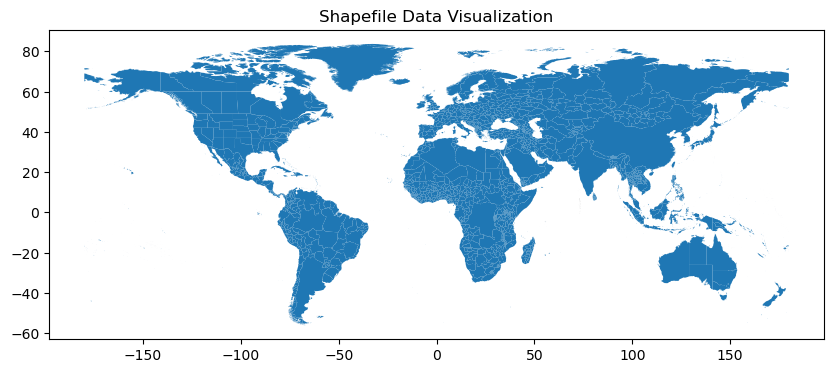

In [29]:
import matplotlib.pyplot as plt

# Plot the spatial data to visualize its distribution
shp_file.plot(figsize=(10, 10))
plt.title("Shapefile Data Visualization")
plt.show()


**Filter our data**

In [24]:
shp_kenya = shp_file[(shp_file['code'] == 'KEN') | (shp_file['geo_name'].str.contains('Kenya', case=False, na=False))]
print(shp_kenya.shape)
print(shp_kenya.info())
shp_kenya.head()


(47, 10)
<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 47 entries, 679 to 725
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   code        47 non-null     object  
 1   geo_year    47 non-null     float64 
 2   geo_source  47 non-null     object  
 3   geo_level   47 non-null     object  
 4   geo_idvar   47 non-null     object  
 5   geo_id      47 non-null     object  
 6   geo_nvar    47 non-null     object  
 7   geo_name    47 non-null     object  
 8   geo_code    47 non-null     object  
 9   geometry    47 non-null     geometry
dtypes: float64(1), geometry(1), object(8)
memory usage: 4.0+ KB
None


,code,geo_year,geo_source,geo_level,geo_idvar,geo_id,geo_nvar,geo_name,geo_code,geometry
679,KEN,2022.0,GADM,1,GID_1,KEN.1_1,NAME_1,Baringo,KEN_2022_GADM1_KEN.1_1,"MULTIPOLYGON (((35.7388 -0.19544, 35.72428 -0...."
680,KEN,2022.0,GADM,1,GID_1,KEN.2_1,NAME_1,Bomet,KEN_2022_GADM1_KEN.2_1,"POLYGON ((35.26033 -1.01608, 35.26021 -1.01621..."
681,KEN,2022.0,GADM,1,GID_1,KEN.3_1,NAME_1,Bungoma,KEN_2022_GADM1_KEN.3_1,"POLYGON ((34.91305 0.85131, 34.91327 0.85148, ..."
682,KEN,2022.0,GADM,1,GID_1,KEN.4_1,NAME_1,Busia,KEN_2022_GADM1_KEN.4_1,"POLYGON ((34.02698 -0.01568, 34.02082 -0.02018..."
683,KEN,2022.0,GADM,1,GID_1,KEN.5_1,NAME_1,Elgeyo-Marakwet,KEN_2022_GADM1_KEN.5_1,"MULTIPOLYGON (((35.53068 0.22495, 35.53475 0.2..."


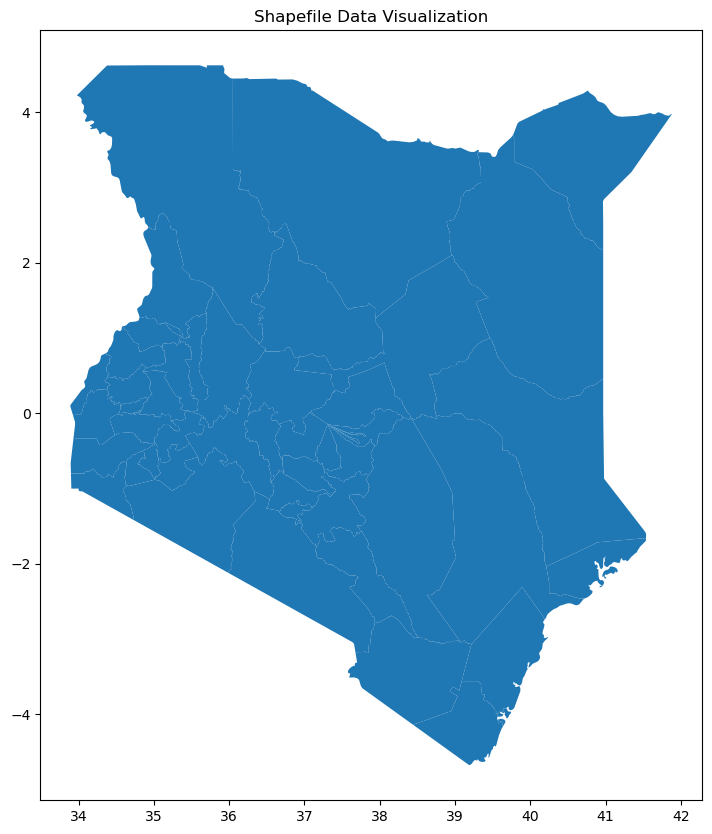

In [28]:
import matplotlib.pyplot as plt

# Plot the spatial data to visualize its distribution
shp_kenya.plot(figsize=(10, 10))
plt.title("Shapefile Data Visualization")
plt.show()


**SHX file**

In [27]:
import shapefile

shx_path = r'C:\Users\user\Documents\PHASE_5- Capstone Project\phase-5-project\Energy-Access-and-Electrification-Planning\data\income_level_data\GSAP_AM24_2021.shx'

with shapefile.Reader(shx_path) as shx_file: 
     print("Shape Type:", shx_file.shapeType)  # View shape type 
     print("Number of Features:", len(shx_file))

Shape Type: 5
Number of Features: 1835
